# Regression
In this section, we will try to solve the problem of **Regression**. In our first step, we will atack the problem from the analytical view.First we start with linear regression after that we try to solve problems with polynomial regression.

### Generate Synthetic Data

We will use rather simple line of $ y = 3x + 10 $ with noise of $ \epsilon = 5 $ to generate test and train data:

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def generate_data(n=50, noise=5.0):
  X = np.linspace(-10, 10, n)
  # the parameters of truth line: y = 3x + 10
  true_slope = 3
  true_intercept = 10
  # add noise to our data to make it a little realistic
  noise = np.random.randn(n) * noise
  y = true_slope * X + true_intercept + noise
  return X, y

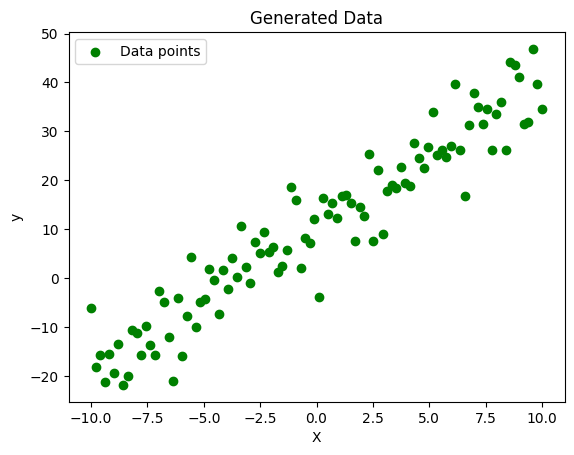

In [57]:
# Visualize our data to show that is linear regression algorithm fit our data or not?
X, y = generate_data(n=100, noise=5.0)
plt.scatter(X, y, color='green', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.show()

## Linear Regression: Analytical Solution

### Implement the Closed-Form Solution

In [58]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
  return w[0] + w[1] * X

#Linear Regression using colsed-form solution
def linear_regression_closed_form(X, y):
  # Adding bias term (x_0 = 1) to the input vector(X)
  X_b = np.c_[np.ones((len(X), 1)), X]
  # Closed-Form solution: W = (X^T * X)^(-1) * X^T * y
  W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
  return W

# Get the parameters(parameter vector)
W = linear_regression_closed_form(X, y)
print("Parameters: ", f"w_1 = {W[1]:.2f}, w_0 = {W[0]:.2f}")

Parameters:  w_1 = 2.92, w_0 = 10.52


We can see that the linear regression has learned quite well from the generated data because the calculated parameters have slight different with actual parameters and this different it's OK because of noise which we added to our generated data.

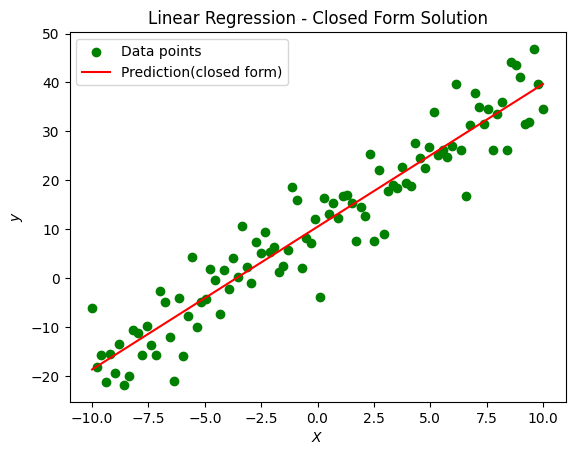

In [59]:
y_pred = h_w(X, W)

#Visualizing the predicted line with our data points
plt.scatter(X, y, color='green', label='Data points')
plt.plot(X, y_pred, color='red', label='Prediction(closed form)')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Linear Regression - Closed Form Solution')
plt.legend()
plt.show()

## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.

### Engineering Polynomial Features

In [60]:
# Function to generate polynomial features (input matrix X)
def polynomial_features(X, degree):
  # First we create the bias vector
  X_poly = np.c_[np.ones((len(X)))]
  # Attaching the combination of features to the bias to build the input matrix
  for i in range(1, degree + 1):
    X_poly = np.c_[X_poly, X **i]

  return X_poly

### Implement Polynomial regression

In [61]:
def polynomial_regression_closed_form(X, y, degree):
  # generate polynomial features
  X_poly = polynomial_features(X, degree)
  # Closed-Form Solution: w = (X'^T * X')^(-1) * X'^T * y
  W = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
  return W

# Get the parameters(parameter vector)
m = 5 # Degree of polynomial regression
W_poly = polynomial_regression_closed_form(X, y, m)

print(f"Parameters (W) for degree {m}: {W_poly}")

Parameters (W) for degree 5: [ 1.08577601e+01  2.10682491e+00 -3.47694975e-02  3.56377821e-02
  4.04957369e-04 -3.07604094e-04]


### Visualize the Polynomial Fit

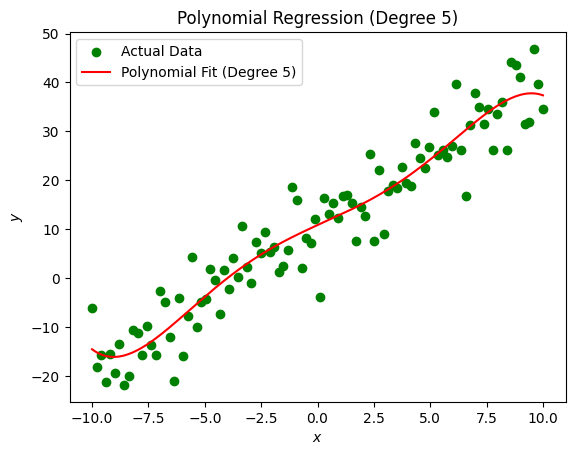

In [62]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(W_poly) # h_w(x) = X' * W

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='red', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Visualizing $E_{rms}$
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

In [63]:
def compute_rms_error(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred) **2))

### Visualizing RMSE for different Polynomial degrees
We could visualize the $ E_{rms} $ better if we split generated data into train and test datasets:

Degree 0: Train RMSE = 18.03, Test RMSE = 17.10
RMSE(Test) - RMSE(Train) = 0.93


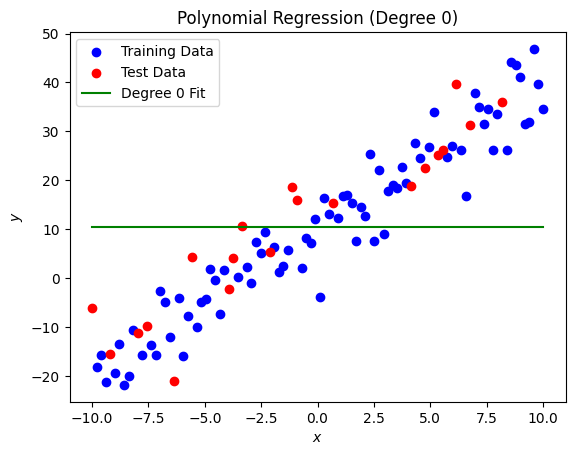

Degree 1: Train RMSE = 4.98, Test RMSE = 7.12
RMSE(Test) - RMSE(Train) = 2.14


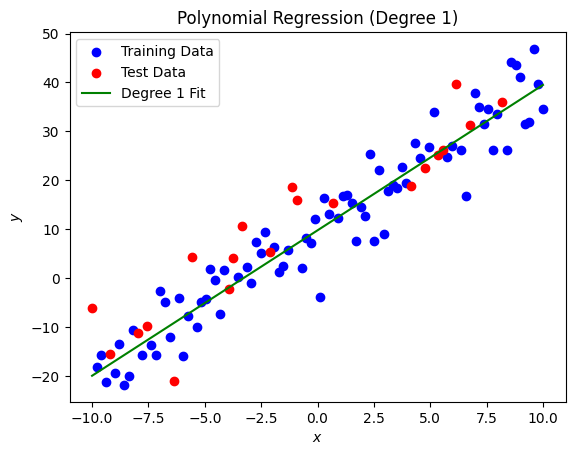

Degree 2: Train RMSE = 4.98, Test RMSE = 7.12
RMSE(Test) - RMSE(Train) = 2.14


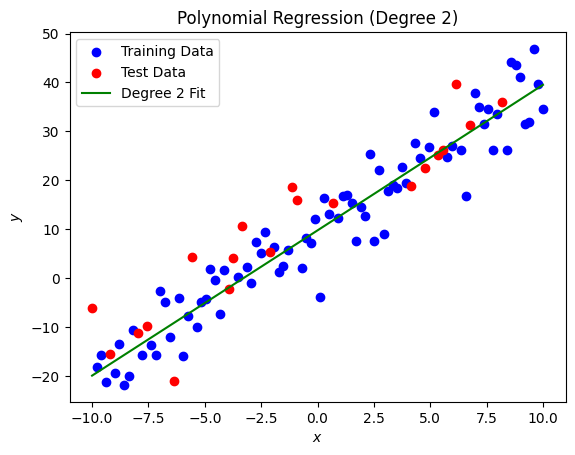

Degree 3: Train RMSE = 4.97, Test RMSE = 7.17
RMSE(Test) - RMSE(Train) = 2.20


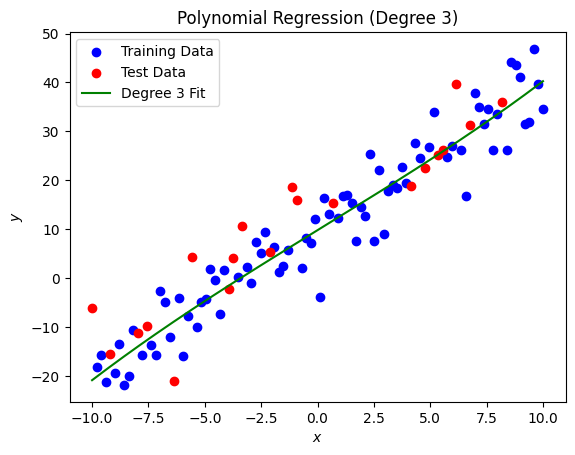

Degree 4: Train RMSE = 4.97, Test RMSE = 7.26
RMSE(Test) - RMSE(Train) = 2.29


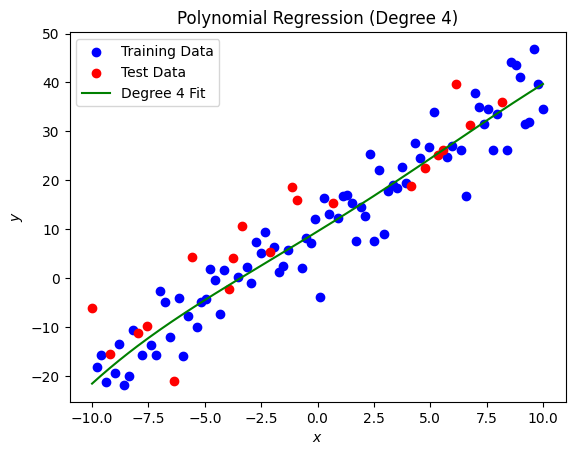

Degree 5: Train RMSE = 4.95, Test RMSE = 6.94
RMSE(Test) - RMSE(Train) = 1.99


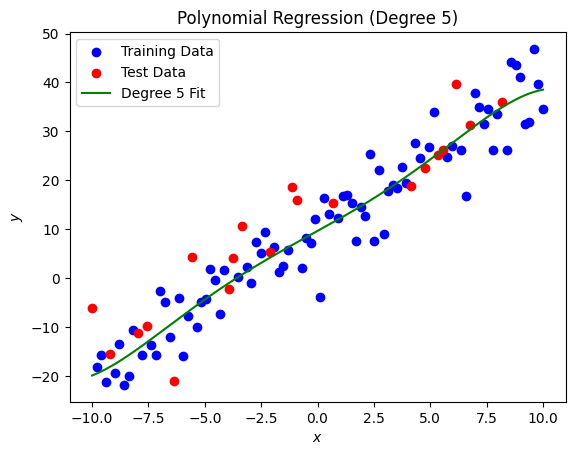

Degree 6: Train RMSE = 4.93, Test RMSE = 6.82
RMSE(Test) - RMSE(Train) = 1.89


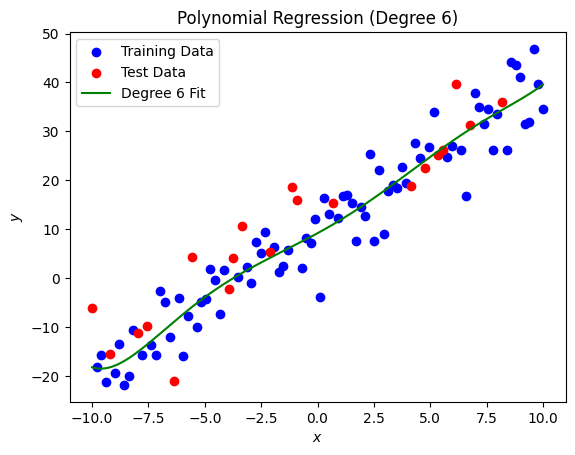

Degree 7: Train RMSE = 4.92, Test RMSE = 6.81
RMSE(Test) - RMSE(Train) = 1.89


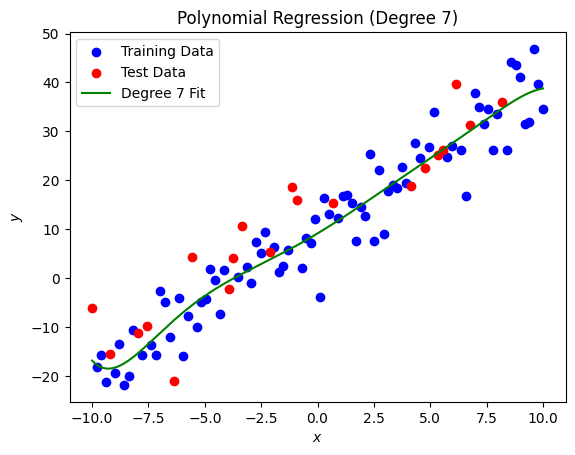

Degree 8: Train RMSE = 4.90, Test RMSE = 7.03
RMSE(Test) - RMSE(Train) = 2.13


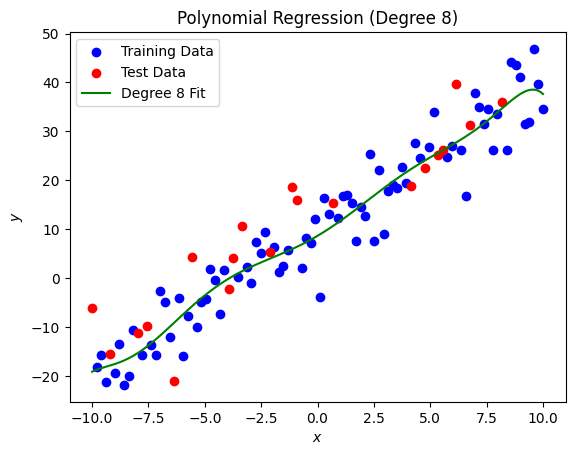

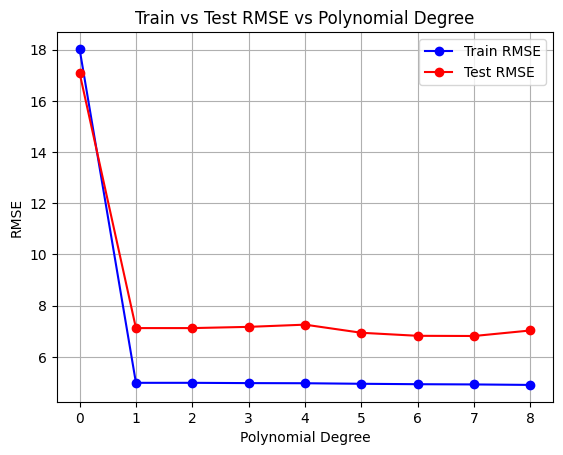

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0,9)
train_rms_errors = []
test_rms_errors = []

for degree in degrees:
  # Train the model in the training set
  W_poly = polynomial_regression_closed_form(X_train, y_train, degree)

  # Compute predictions for the training set
  X_train_poly = polynomial_features(X_train, degree)
  y_train_pred = X_train_poly.dot(W_poly)

  # Compute predictions for the test set
  X_test_poly = polynomial_features(X_test, degree)
  y_test_pred = X_test_poly.dot(W_poly)

  # Calculate RMSE for both training adn test sets
  train_rms_error = compute_rms_error(y_train, y_train_pred)
  test_rms_error = compute_rms_error(y_test, y_test_pred)

  # Store the errors
  train_rms_errors.append(train_rms_error)
  test_rms_errors.append(test_rms_error)

  # Print the RMSE for the current degree
  print(f'Degree {degree}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}')

  #
  RMSE_difference = abs(test_rms_error - train_rms_error)
  print(f"RMSE(Test) - RMSE(Train) = {RMSE_difference:.2f}")

  # Plot the polynomial fit on the training data
  plt.scatter(X_train, y_train, color='blue', label='Training Data')
  plt.scatter(X_test, y_test, color='red', label='Test Data')
  X_fit = np.linspace(X.min(), X.max(), 200)
  X_fit_poly = polynomial_features(X_fit, degree)
  y_fit_pred = X_fit_poly.dot(W_poly)
  plt.plot(X_fit, y_fit_pred, color='green', label=f'Degree {degree} Fit')
  plt.title(f"Polynomial Regression (Degree {degree})")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.legend()
  plt.show()

# Plot RMSE for the Training and Test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases **(Why ?)**. However; testing error can increase.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

### Implementing GD for linear regression

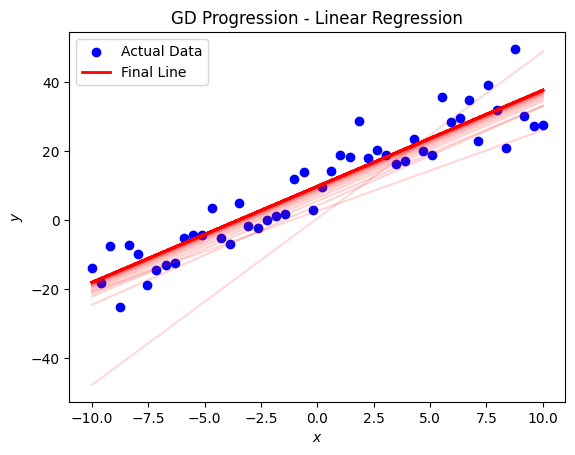

In [65]:
# SSE cost function
def cost_function(X, y, w):
  return np.sum((h_w(X, w) - y) **2) / len(X)

# Gradient Descent
def gradient_descent(X, y, w, alpha, num_iters):
  m = len(X)
  cost_history = []
  w_history = []

  for i in range(num_iters):
    # Update each iteration
    gr_w0 = np.sum(h_w(X, w) - y) / m
    gr_w1 = np.sum((h_w(X, w) - y) * X) / m
    w[0] -= alpha * gr_w0
    w[1] -= alpha * gr_w1

    cost_history.append(cost_function(X, y, w))
    w_history.append(w.copy()) # Store a copy of w, not the reference

  return w, cost_history, w_history

X, y = generate_data(n=50, noise=5.0)
w_initial = [0, 0]
eta = 0.05
num_iters = 500

# Run Gradient Descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)

# Visualize Cost function
w0_vals = np.linspace(0, 16, 200)
w1_vals = np.linspace(-5,5, 200)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    w = [w0_vals[i], w1_vals[j]]
    J_vals[i, j] = cost_function(X, y, w)



# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
  alpha = 0.15 + 0.85*(idx) / 100 # Gradually increase alpha for each line
  plt.plot(X, h_w(X, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

The update at each iteration tries to minimize cost function thus improving weights. As you can see, the final line after 500 iterations is the line best describing datapoints. But how can we be sure that cost function is optimizable ?

### Plotting cost function
To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

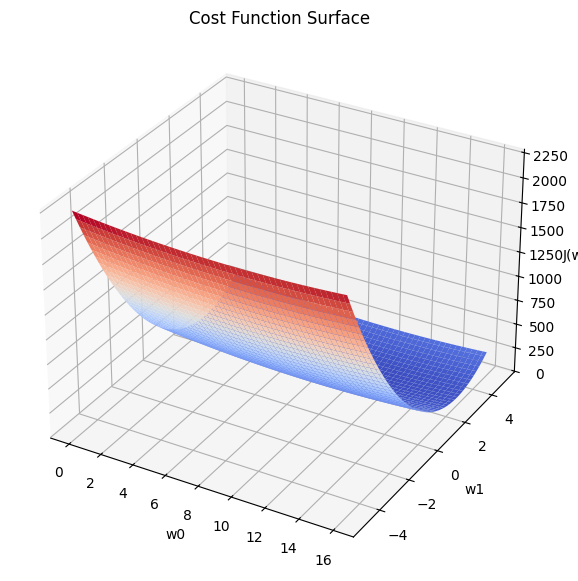

In [66]:
# 3D plot of J(w)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
w0, w1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(w0, w1, J_vals.T, cmap='coolwarm')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J(w)')
plt.title("Cost Function Surface")
plt.show()


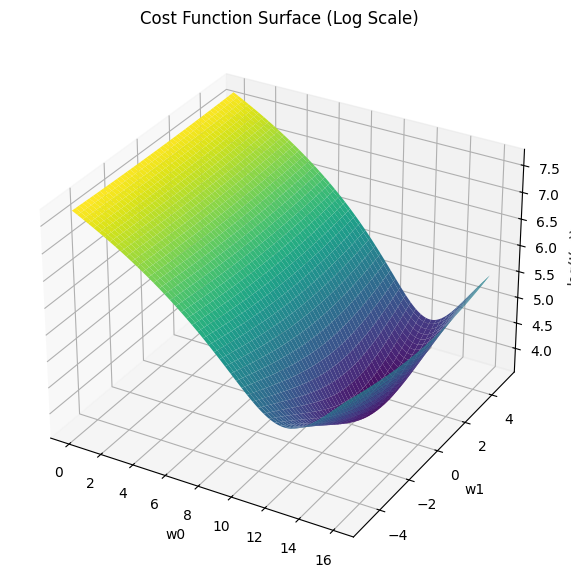

In [67]:
# 3D plot of log(J(w))
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
w0, w1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(w0, w1, np.log(J_vals), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()


Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal ? Let's visualize it:

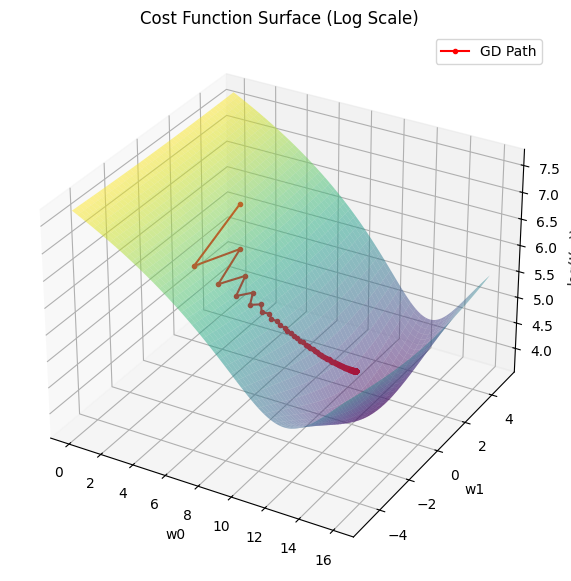

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
w0, w1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(w0, w1, np.log(J_vals), cmap='viridis', alpha=0.5)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history)) # Log of the cost history

# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-65-2639d36e1d2b>:3: RuntimeWarning: overflow encountered in square
  return np.sum((h_w(X, w) - y) **2) / len(X)


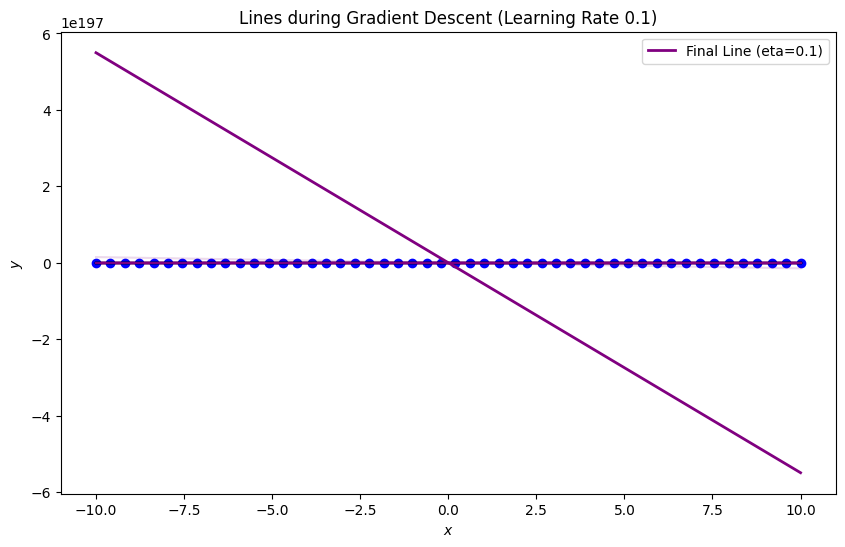

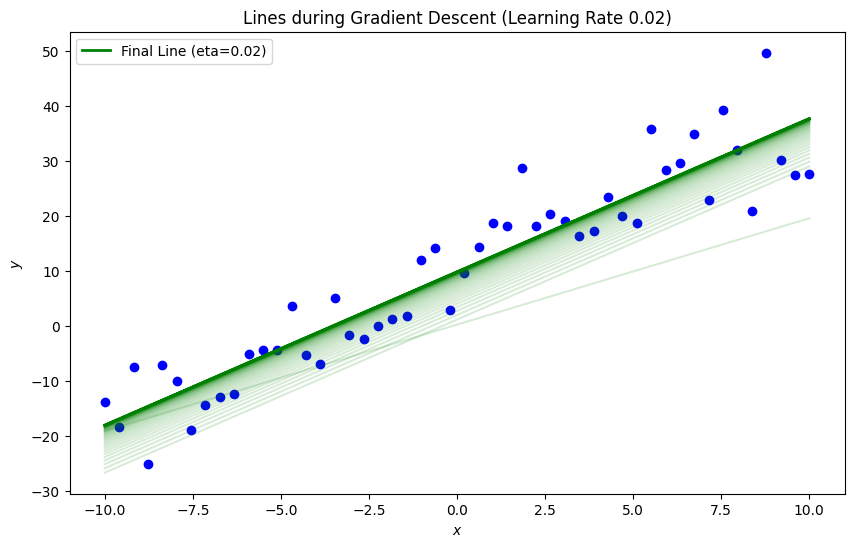

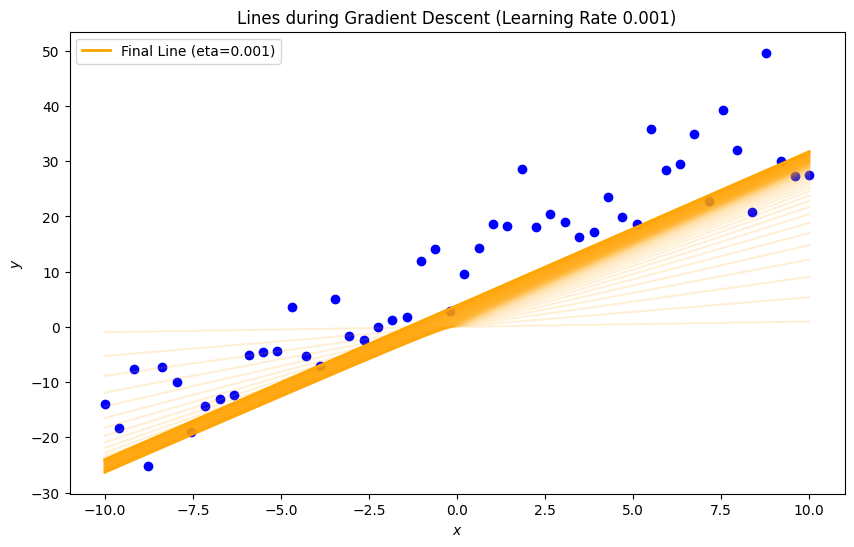

In [69]:
learning_rates = [0.1, 0.02, 0.001]
num_iters = 500
w_initial = [0, 0]

colors = ['purple', 'green', 'orange']

cost_histories = []

# GD for each eta
for idx, eta in enumerate(learning_rates):
    w_final, cost_history, w_history = gradient_descent(X, y, w_initial.copy(), eta, num_iters)
    cost_histories.append(cost_history)

    plt.figure(figsize=(10, 6))
    for step_idx, w in enumerate(w_history[::num_iters // 100]):
        alpha_val = 0.15 + 0.85*(idx) / 100
        plt.plot(X, h_w(X, w), color=colors[idx], alpha=alpha_val)

    plt.plot(X, h_w(X, w_final), lw=2, label=f'Final Line (eta={eta})', color=colors[idx])
    plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.show()

As shown in the plots above, choosing a large learning rate leads to divergence. In this example, the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example, learning $ w_0 $ is happening at a slow time because the update rule is being changed almost minimially !

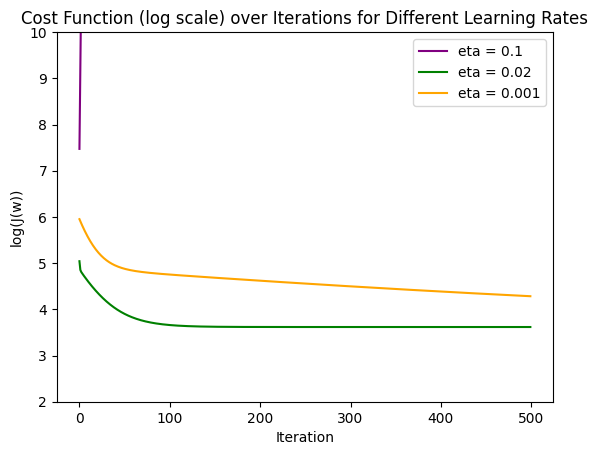

In [72]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx]), label=f'eta = {learning_rates[idx]}', color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()